# LAB3
Vince Ling

In [34]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
from collections import Counter


# Problem 1

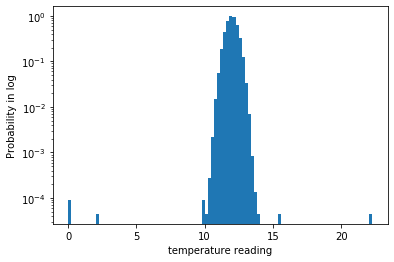

In [35]:
a=[10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
data=stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
full = np.append(data, a)
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.xlabel("temperature reading")
plt.ylabel("Probability in log")
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

A2:QUESTION : What data point are within 5σ of the background distribution?
The reason I choose this question is because this is the real data we keep that doesn't contain any anomalous read.

A3:Calculate the data inside the 5σ 

A4:Truth table:

In [63]:
X = np.sort(full)
D = np.array([])
D_1 = np.array([])

def truthtable(s):
    sigma = stats.norm.sf(s)
    maxTemp = stats.norm.isf(sigma, loc=12, scale=0.4)
    minTemp = stats.norm.isf(1-sigma, loc=12, scale=0.4)
    D = X[np.logical_and(X > minTemp, X < maxTemp)]
    D_1 = X[np.logical_or(X < minTemp, X > maxTemp)]
    TP = sum((Counter(data) & Counter(D)).values())
    FP = sum((Counter(D) & Counter(a)).values())
    TN = sum((Counter(data) & Counter(D_1)).values())
    FN = sum((Counter(D_1) & Counter(a)).values())
    
    table = pd.DataFrame(data=[[TP,FP],[TN,FN]],
                     index=["Pos", "Neg"],
                     columns=["True", "False"])
    return table

In [64]:
#Construct a truthtable for 5σ
truthtable(5)

,True,False
Pos,100000,2
Neg,0,6


There are two mistakes(12.7 and 10.3) , if we included all data at greater than 5 sigma significance there would be more FP less TN less FN

B:Counstruct truth table for different threshold

In [65]:
truthtable(3)

,True,False
Pos,99743,1
Neg,257,7


When we choose 3, TP decresed by one and TN increase by one, however we need to thrown out 264 values

In [58]:
truthtable(7)

,True,False
Pos,100000,3
Neg,0,5


When we choose 7, TP increased by one and TN decreased by one(increase errors of commission and reduce the errors of omission)so  we can have more real data.

C:contruct a true table for all thrown out 12.7

In [71]:
sigma = stats.norm.isf(stats.norm.sf(12.7, scale=0.4, loc=12))
truthtable(sigma)
sigma

1.7499999999999984

We need to thrown out 8019 of real data in order to remove all mistakes of commission and about 1.75 sigma

# Problem 2

In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

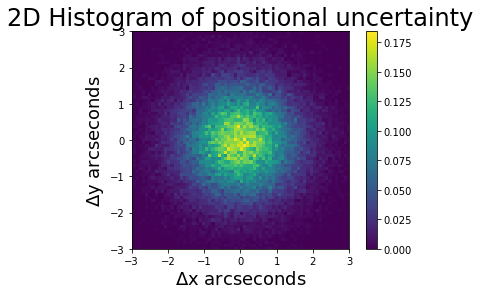

In [72]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

1. QUESTION: What distance would an asteriod travel(in arcseconds) to have 5σ certainty?

2. Measure the distance(probility)of 5 sigma certainty or greater

3:

In [76]:
fivesig = stats.norm.sf(5)
distance = stats.rayleigh.isf(fivesig)

In [82]:
print("It would take "+str(distance) +" distance in arcseconds for an asteriod to have a 5σ certainty")

It would take 5.489079776062419 distance in arcseconds for an asteriod to have a 5σ certainty


# Problem 3

As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).

Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

1.What is the probability of seeing 6800 rays or less in 15 days?

2.Let $P$ be the Poisson distribution . Find the probability of a signal of strength $Y=6800$ over $N=7200$ samples, given a probability mass function $f(p)$.

3.

In [88]:
mean = 7200
probability = stats.poisson.cdf(6800,mean)
sigma = stats.norm.ppf(1-probability)
print("The sigma value is " + str(sigma))
print('The probability is ' + str(probability))

The sigma value is 4.750747965778662
The probability is 1.0133280183917768e-06
